# Ella Serber

## Research question/interests
My primary research question (RQ 1) asks: Is there a relationship among various personality factors?
    
Hypothesis 1: Based on extant research, there is a positive correlation between Openness and Extraversion; Openness and Agreeableness; Extraversion and Agreeableness; Conscientiousness and Agreeableness; Emotional Stability* and Extraversion, and Emotional Stability* and Agreeableness. 

My secondary research question (RQ 2) asks: How do scores between males and females differ on the 5 personality factors?
    
Hypothesis 2: Based on extant research, on average, females will show higher scores than men on Extraversion, and Agreeableness, lower scores on Neuroticism, and there are will be no significant gender differences for Conscientiousness or Openness.

*Note: in the dataset, high neuroticism (low emotional stability) is at the low end of the continuum so a high score on the N factor corresponds to low neuroticism/high emotional stability.

## Load packages and data 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
dat_1 = pd.read_csv("../data/raw/data.csv", sep='\t')
dat_1

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19715,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19716,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19717,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


## EDA
*Note: more detailed information and interpretation will be included in tasks 3 and 4*

##### Gives number of rows and columns

In [ ]:
dat_1.shape

(19719, 57)

##### Gives all column names

In [ ]:
dat_1.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10'],
      dtype='object')

##### Gives shortened dataframe for specified number of rows 

In [ ]:
dat_1.head(10)

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
5,13,31,1,2,1,2,US,1,5,2,...,4,2,1,3,3,5,5,4,5,3
6,5,20,1,2,1,5,US,5,1,5,...,3,1,5,1,4,1,4,3,3,4
7,4,23,2,1,1,2,IN,4,3,5,...,3,1,5,1,4,1,5,3,2,5
8,5,39,1,2,3,4,US,3,1,5,...,3,3,5,3,5,1,5,3,4,5
9,3,18,1,2,1,5,US,1,4,2,...,4,2,5,2,4,1,4,3,4,4


##### Gives number of unique values for each column

Checking to ensure E1 through O10 only have 6 unique responses (per survey format)

In [ ]:
dat_1.nunique(axis=0)

race        14
age        104
engnat       3
gender       4
hand         4
source       5
country    158
E1           6
E2           6
E3           6
E4           6
E5           6
E6           6
E7           6
E8           6
E9           6
E10          6
N1           6
N2           6
N3           6
N4           6
N5           6
N6           6
N7           6
N8           6
N9           6
N10          6
A1           6
A2           6
A3           6
A4           6
A5           6
A6           6
A7           6
A8           6
A9           6
A10          6
C1           6
C2           6
C3           6
C4           6
C5           6
C6           6
C7           6
C8           6
C9           6
C10          6
O1           6
O2           6
O3           6
O4           6
O5           6
O6           6
O7           6
O8           6
O9           6
O10          6
dtype: int64

##### Descriptive stats for entire dataframe

Clearly, something is off with the 'age' column (mean, std, and max do not make sense) -- however, this column will not be used in further analyses so this is not of concern for the current research

In [ ]:
dat_1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,...,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,5.324205,50767.027892,1.365130,1.616918,1.130128,1.952280,2.628937,2.759724,3.416755,3.152036,...,3.692479,2.149653,4.126122,2.079416,3.873016,1.794766,4.072975,3.208023,4.133577,4.004767
std,4.019064,7121271.921823,0.488796,0.499122,0.413663,1.504770,1.232565,1.313818,1.236820,1.222822,...,1.116302,1.135227,1.006806,1.109751,0.939655,1.068513,0.923595,1.258921,0.982868,0.983729
min,0.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,...,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,22.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,4.000000,3.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000
75%,8.000000,31.000000,2.000000,2.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,13.000000,999999999.000000,2.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


##### Gives each unique value for a column (e.g., age)

Based on previous output, I wanted to look at all the unique values of age to try and figure out why the descriptive stats look very strange

In [ ]:
dat_1.age.unique()

array([       53,        46,        14,        19,        25,        31,
              20,        23,        39,        18,        17,        15,
              22,        21,        28,        26,        29,        52,
              48,        37,        42,        27,        60,        24,
              47,        35,        34,        36,        54,        45,
              32,        49,        13,        33,        16,        30,
              59,        41,        44,        43,        38,      1997,
              40,        55,        58,        51,        57,      1995,
              56,        68,        70,        50,        76,        63,
              65,      1994,        62,        61,        67,        69,
            1992,        66,      1988,      1990,      1999,        74,
              73,        64,        71,      1989,        72,      1984,
       999999999,      1993,       208,      1996,        75,      1982,
            1991,      1998,      1961,        92, 

##### Descriptive stats for one column 
not useful now, but might be later once factor total columns are created

In [ ]:
print(dat_1.E1.describe())
print(dat_1.N1.describe())

count    19719.000000
mean         2.628937
std          1.232565
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: E1, dtype: float64
count    19719.000000
mean         3.262082
std          1.308169
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: N1, dtype: float64


##### Drop unwanted columns (not going to be used)

In [ ]:
dat_2 = dat_1.copy().drop(['engnat','hand','source', 'country', 'race', 'age'], axis=1)

##### Check for missing values

In [ ]:
pd.isnull(dat_2).values.any()

False

##### Check for NaN values

In [ ]:
np.isnan(dat_2).values.any()

False

#### Checkpoint
So far, so good. I have loaded the dataset and imported packages, done some basic exploration of the dataset, located and removed columns that are not of use for further analysis, and shown that there are no null or NaN values. Next, I will look for rows in which there are invalid data or outliers (and if so, remove them) and locate the rows where "gender" is missing or reported as "other".

In [ ]:
dat_2.loc[dat_2["E1"] == 0]
#Find "0" in column "E1" (can use for any column)

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
19064,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dat_2 = dat_2.copy().drop([19064], axis=0)

#Remove row with missing data

In [ ]:
dat_2a = dat_2.copy().drop(['gender'], axis=1)
print(dat_2a.loc[(dat_2a==0).any(1)])

#No "0" values (once gender is removed, since gender = 0 in many cases)

Empty DataFrame
Columns: [E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, N1, N2, N3, N4, N5, N6, N7, N8, N9, N10, A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, O1, O2, O3, O4, O5, O6, O7, O8, O9, O10]
Index: []

[0 rows x 50 columns]


In [ ]:
print(pd.unique(dat_2["gender"]))
#Gives unique values for "gender" column
#Need to remove gender = 0 (missing) and gender = 3 (other)

dat_2.loc[dat_2['gender'] == 0]
dat_2.loc[dat_2['gender'] == 3]
#Shows where gender is missing (0) or 'other' (3) -- only displays the latter output but can run either one individually by printing or commenting the other one out
#Want to drop these rows (without entering each manually) 

[1 2 3 0]


,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
57,3,2,2,2,2,2,1,1,2,4,...,4,2,3,2,3,2,4,4,2,2
247,3,1,5,2,5,1,4,1,5,1,...,3,2,5,3,3,1,4,3,4,3
400,3,1,3,2,3,4,1,1,4,2,...,5,3,5,1,5,1,5,5,4,4
489,3,2,3,3,3,4,1,2,4,2,...,4,1,5,1,5,1,4,3,5,5
554,3,1,2,1,3,2,2,1,3,3,...,5,1,5,1,4,1,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17823,3,3,3,3,5,2,3,3,3,3,...,2,3,2,3,3,3,3,2,5,3
17827,3,2,5,3,5,2,4,2,5,1,...,3,2,5,1,4,1,5,3,3,4
18008,3,2,4,3,4,2,3,3,5,3,...,5,1,4,1,4,1,5,4,5,5
18754,3,2,4,4,4,4,4,1,4,2,...,5,2,5,1,5,1,5,5,5,5


#### Checkpoint
One row had missing data for the desired columns, so it was removed. 102 rows have "gender" = 3 (other) and 24 rows have "gender" = 0 (missing); these rows will be removed in a later step when subsetting the dataframe. Now I am ready to reverse score certain items and create factor total scores. 

### Reverse Scoring

In [ ]:
#Reverse Scored Items: E2, E4, E6, E8, E10, N1, N3, N5, N6, N7, N8, N9, N10, A1, A3, A5, A7, C2, C4, C6, C8, O2, O4, O6

#Create function to reverse score
def reverseScoring(df, high, cols):
    df[cols] = high - df[cols]
    return df

#call function for items that are reverse scored
dat = reverseScoring(dat_2, 6, cols=["E2", "E4", "E6", "E8", "E10", "N1", "N3", "N5", "N6", "N7", "N8", "N9", "N10", "A1", "A3", "A5", "A7", "C2", "C4", "C6", "C8", "O2", "O4", "O6"])
dat

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,4,4,5,4,5,5,4,3,5,...,4,5,3,5,5,5,4,2,5,5
1,2,2,4,3,3,3,3,1,1,1,...,3,3,3,3,2,3,3,1,3,2
2,2,5,5,1,2,5,5,1,1,5,...,4,1,5,5,5,5,5,5,5,5
3,2,2,1,2,2,3,2,3,2,4,...,4,3,5,4,4,4,5,2,5,5
4,2,3,5,3,3,3,5,3,5,3,...,3,5,1,5,3,5,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,2,1,2,3,1,4,3,1,4,1,...,1,3,5,3,4,5,4,2,5,3
19715,2,2,3,2,3,2,3,2,2,4,...,1,4,3,4,3,3,4,2,3,3
19716,1,2,1,4,1,5,1,1,4,1,...,5,3,1,3,4,5,1,5,5,5
19717,1,1,2,2,3,2,2,1,3,4,...,3,4,5,3,4,5,5,3,5,5


### Factor scores

In [ ]:
dat["E_Tot"] = dat["E1"]+dat["E2"]+dat["E3"]+dat["E4"]+dat["E5"]+dat["E6"]+dat["E7"]+dat["E8"]+dat["E9"]+dat["E10"]
dat["N_Tot"] = dat["N1"]+dat["N2"]+dat["N3"]+dat["N4"]+dat["N5"]+dat["N6"]+dat["N7"]+dat["N8"]+dat["N9"]+dat["N10"]
dat["A_Tot"] = dat["A1"]+dat["A2"]+dat["A3"]+dat["A4"]+dat["A5"]+dat["A6"]+dat["A7"]+dat["A8"]+dat["A9"]+dat["A10"]
dat["C_Tot"] = dat["C1"]+dat["C2"]+dat["C3"]+dat["C4"]+dat["C5"]+dat["C6"]+dat["C7"]+dat["C8"]+dat["C9"]+dat["C10"]
dat["O_Tot"] = dat["O1"]+dat["O2"]+dat["O3"]+dat["O4"]+dat["O5"]+dat["O6"]+dat["O7"]+dat["O8"]+dat["O9"]+dat["O10"]
#Create new columns containing the total scores for each individual on each of the 5 factors 

### Create Variables for the Average of Each Factor Total Score

In [ ]:
E_Avg = sum(dat["E_Tot"])/len(dat)
A_Avg = sum(dat["A_Tot"])/len(dat)
N_Avg = sum(dat["N_Tot"])/len(dat)
C_Avg = sum(dat["C_Tot"])/len(dat)
O_Avg = sum(dat["O_Tot"])/len(dat)
#Total average (mean) for each factor

## Subsets

In [ ]:
dat_reduced_g1 = dat[["gender", "E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]
values = [0,3]
dat_reduced_g = dat_reduced_g1[dat_reduced_g1.gender.isin(values) == False]
dat_reduced = dat[["E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]
#Create subsests with desired columns (with and without gender) and remove rows where gender = 3 (missing) or 0 (neither male nor female)

In [ ]:
print(dat_reduced.loc[(dat_reduced==0).any(1)])
#Check that no more rows contain 0's (i.e., missing/invalid data)
#looks good (no 0's), continue analysis

Empty DataFrame
Columns: [E_Tot, N_Tot, A_Tot, C_Tot, O_Tot]
Index: []


In [ ]:
values = [0, 3, 1]
dat_f = dat_reduced_g[dat_reduced_g.gender.isin(values) == False]
dat_f
#Create "female" subset (only include rows where gender = 2 (female)

,gender,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
1,2,22,29,35,42,26
2,2,35,14,38,49,45
3,2,22,17,37,26,41
4,2,34,30,44,34,34
5,2,16,36,36,31,33
...,...,...,...,...,...,...
19710,2,30,24,40,34,33
19711,2,21,26,42,36,39
19712,2,40,43,48,30,39
19714,2,21,19,42,36,35


In [ ]:
values = [0, 3, 2]
dat_m = dat_reduced_g[dat_reduced_g.gender.isin(values) == False]
dat_m
#Create "male" subset (only include rows where gender = 1 (male)

,gender,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
0,1,44,49,46,47,43
7,1,39,45,41,44,42
11,1,30,36,35,30,38
15,1,28,41,17,42,47
23,1,33,38,41,31,38
...,...,...,...,...,...,...
19708,1,25,35,40,20,44
19713,1,14,39,43,37,30
19716,1,21,10,26,23,37
19717,1,21,20,38,43,42


#### Checkpoint
Great! Now I have subsetted dataframes that can be used for future analyses. Next, I will try out various visualizations to see which work best for answering my research questions. 

### Visualizations (EDA)

array([[<AxesSubplot: title={'center': 'O_Tot'}>]], dtype=object)

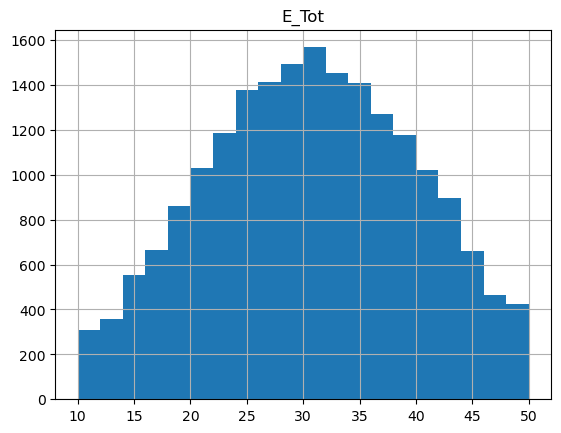

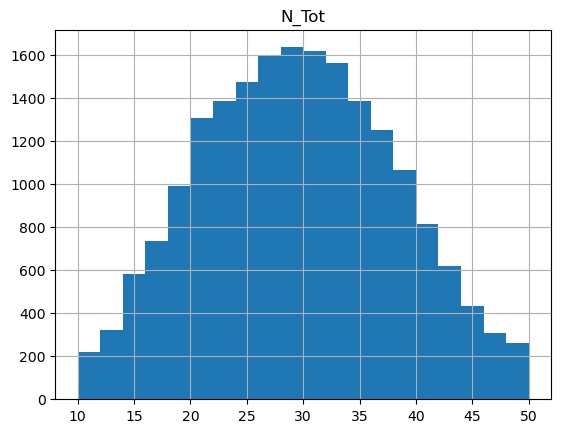

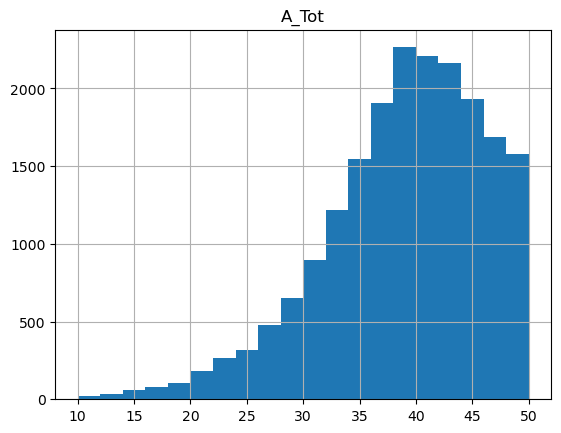

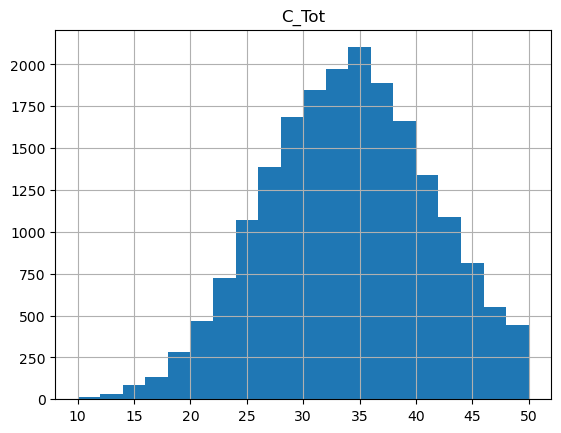

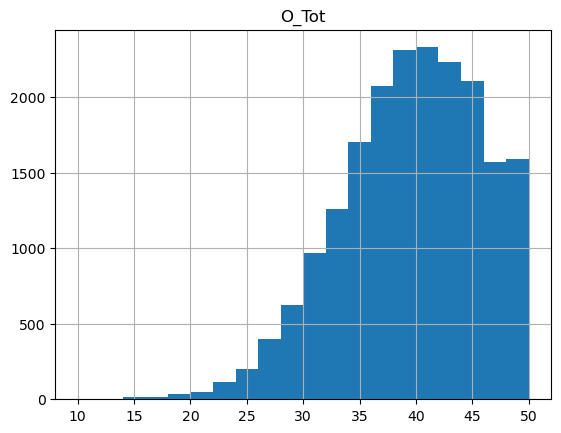

In [ ]:
dat_reduced_g.hist(column= "E_Tot", bins =20)
dat_reduced_g.hist(column= "N_Tot", bins =20)
dat_reduced_g.hist(column= "A_Tot", bins =20)
dat_reduced_g.hist(column= "C_Tot", bins =20)
dat_reduced_g.hist(column= "O_Tot", bins =20)

Shows distribution of each factor for males and females (combined)

E and N show normal distributions

C shows a slight negative skew 

A and O show negative skew (i.e., data is clustered closer to the high end of the continuum)

array([<AxesSubplot: title={'center': '1'}>,
       <AxesSubplot: title={'center': '2'}>], dtype=object)

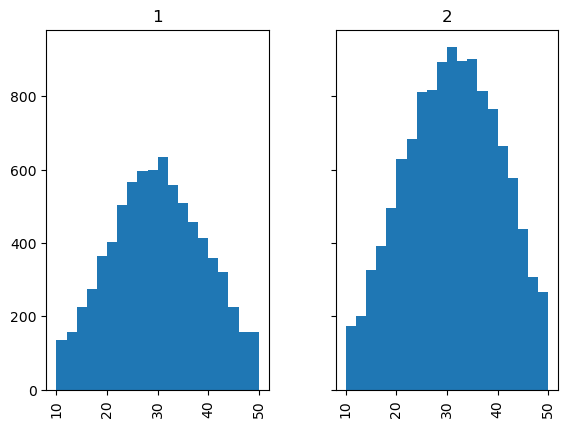

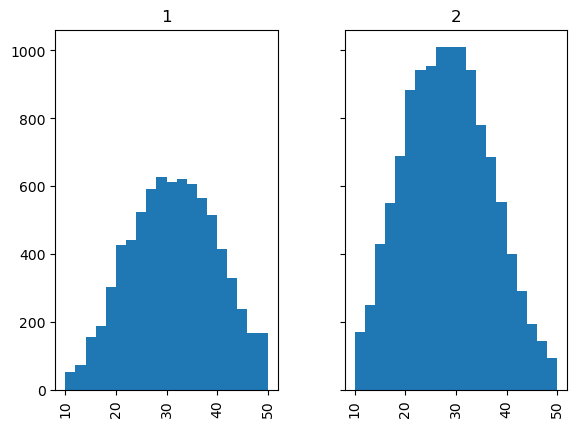

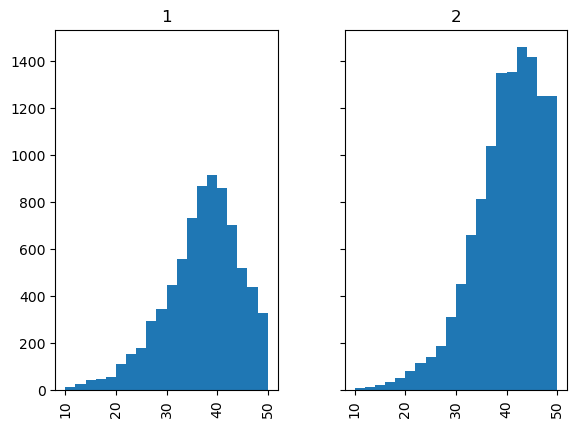

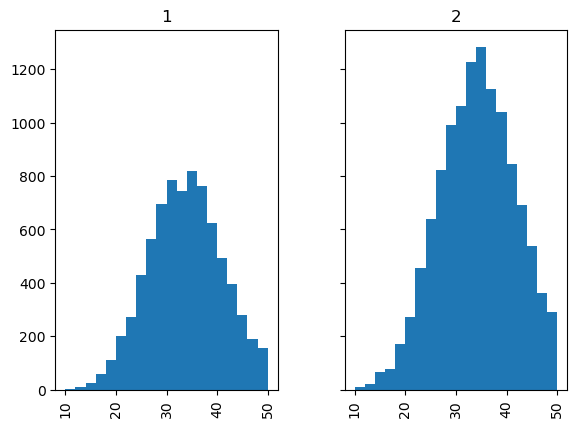

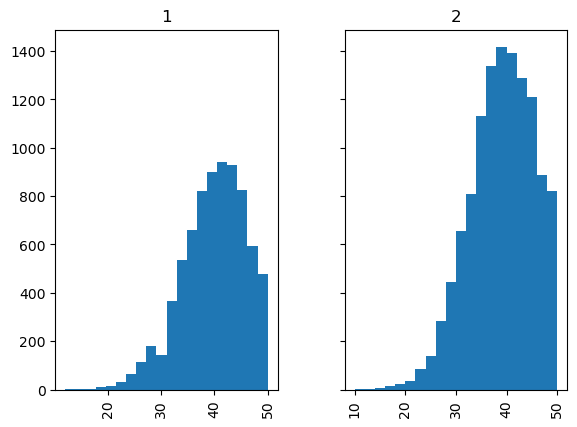

In [ ]:
dat_reduced_g.hist(column= "E_Tot", by = "gender", bins=20, sharey=True)
dat_reduced_g.hist(column= "N_Tot", by = "gender", bins=20, sharey=True)
dat_reduced_g.hist(column= "A_Tot", by = "gender", bins=20, sharey=True)
dat_reduced_g.hist(column= "C_Tot", by = "gender", bins=20, sharey=True)
dat_reduced_g.hist(column= "O_Tot", by = "gender", bins=20, sharey=True)

Shows distribution of each factor for males and females (separately)

Probably won't use -- difficult to interpret since many less males than females in sample and not relevant to RQ

[Text(0.5, 1.0, 'Average Factor Scores'),
 Text(0, 0.5, 'Mean Average'),
 Text(0.5, 0, 'Factor')]

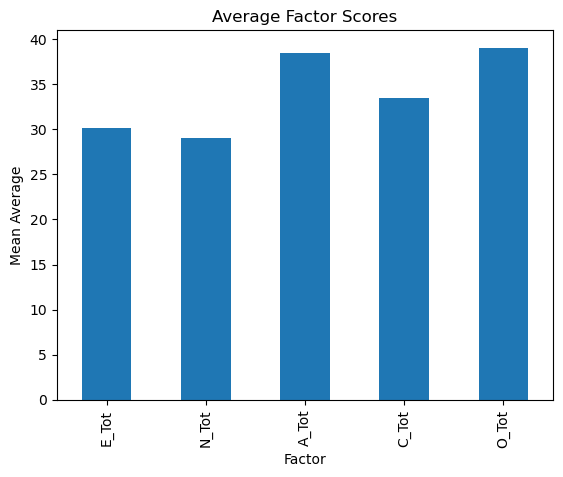

In [ ]:
dat_reduced.mean().plot.bar().set(title = "Average Factor Scores", ylabel = "Mean Average", xlabel = "Factor")

Shows mean average for each category (both genders) -- A and O have higher averages than the others

Probably won't be used for actual analysis but interesting to see and get a sense of the overall data

[Text(0.5, 1.0, 'Number of Males and Females in Sample'),
 Text(0.5, 0, 'Gender (1 = male, 2 = female)'),
 Text(0, 0.5, 'Number of Participants')]

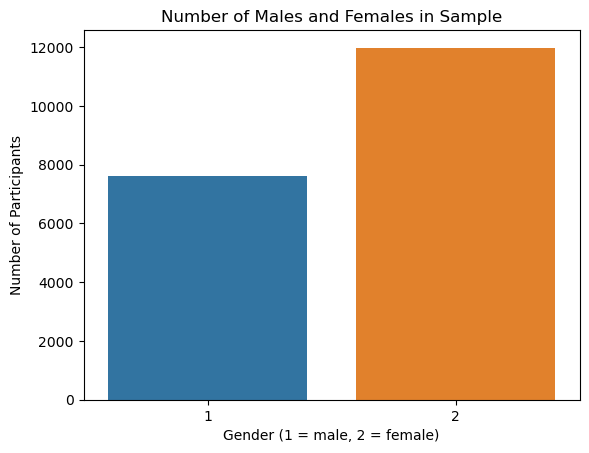

In [ ]:
sb.countplot(x = "gender", data = dat_reduced_g).set(title = "Number of Males and Females in Sample", xlabel = "Gender (1 = male, 2 = female)", ylabel = "Number of Participants")

Many more females than males in sample 

Probably not useful for further analysis, but interesting to see here and good to be aware of for making generalizability claims

[Text(0.5, 1.0, 'Average Factor Total Score By Gender'),
 Text(0.5, 0, 'Gender (1 = male, 2 = female)'),
 Text(0, 0.5, 'Mean Factor Score')]

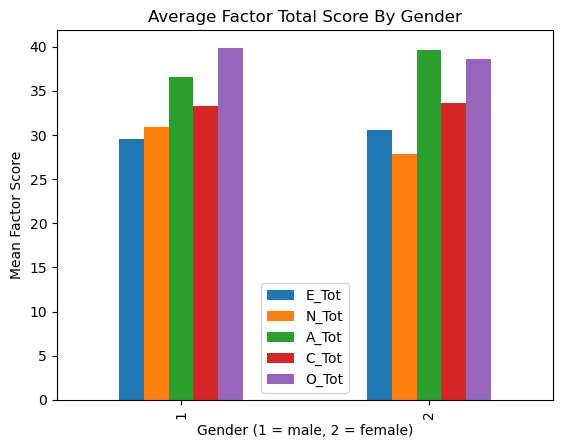

In [ ]:
dat_reduced_g.groupby("gender").mean().plot.bar().set(title = "Average Factor Total Score By Gender", xlabel = "Gender (1 = male, 2 = female)", ylabel = "Mean Factor Score")

Shows mean average for each factor, separated by gender

Males higher than females on O and N

Females higher than males on E, A, and C

<seaborn.axisgrid.PairGrid>

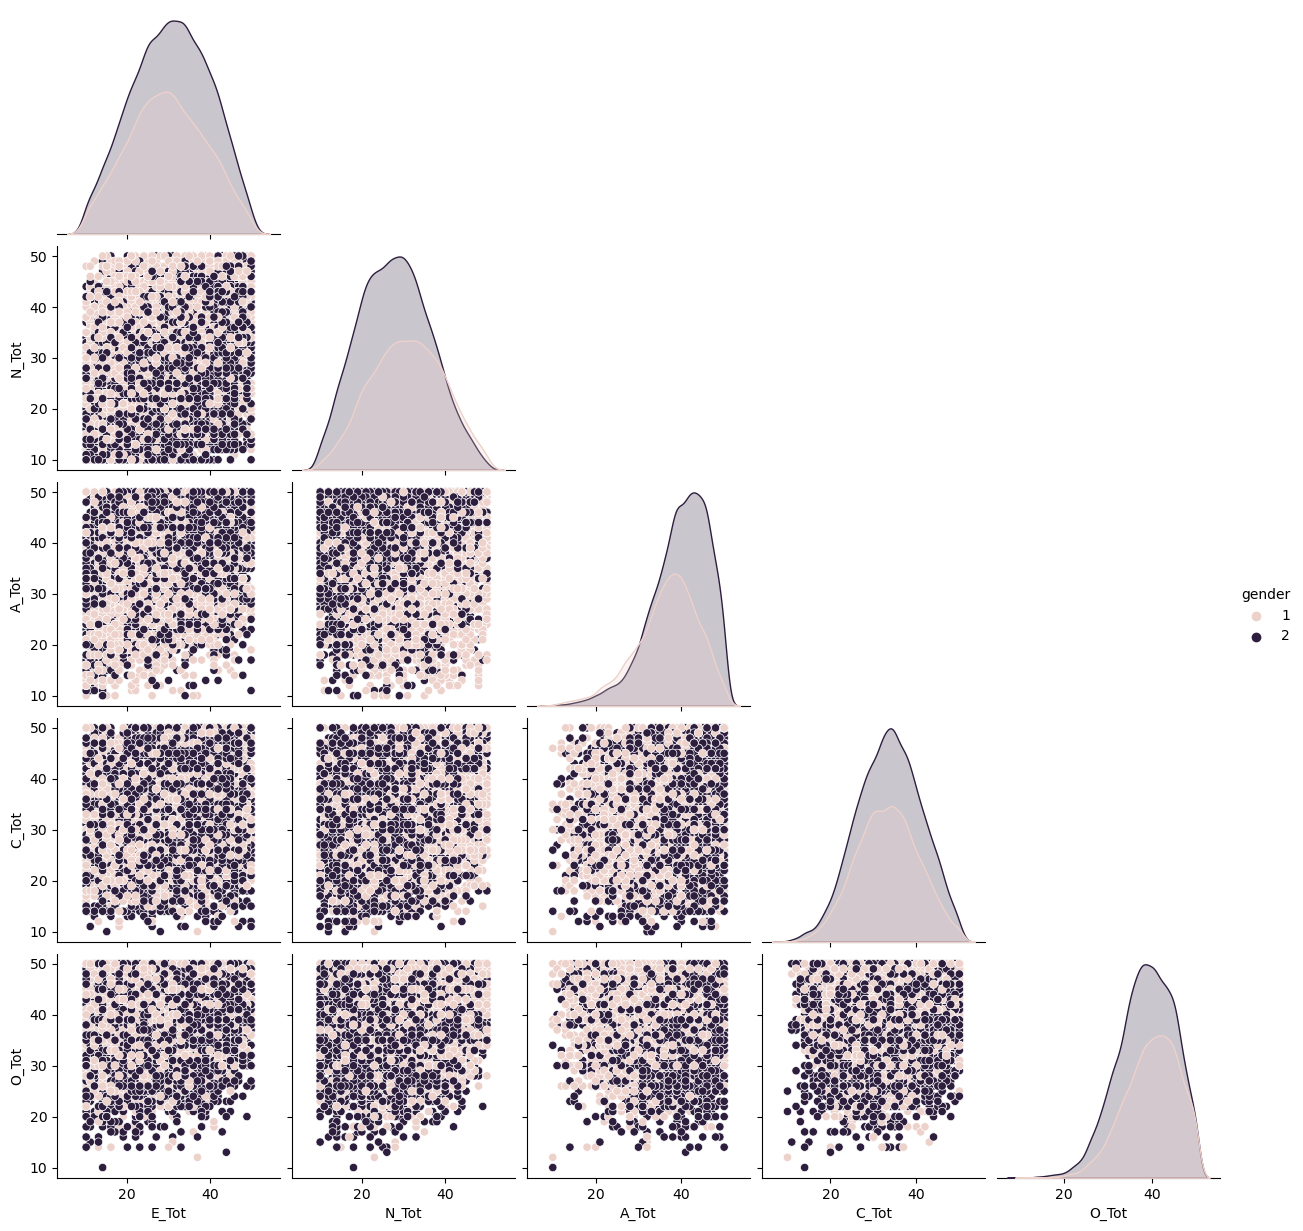

In [ ]:
sb.pairplot(dat_reduced_g, hue = "gender", corner = True)

Not very useful (too many data points)

Shows differences in distribution of factor scores for males and females but does not necessarily help answer RQ

Also hard to interpret since there are more females than males in the sample

A_Tot       AxesSubplot(0.125,0.11;0.133621x0.77)
C_Tot    AxesSubplot(0.285345,0.11;0.133621x0.77)
E_Tot     AxesSubplot(0.44569,0.11;0.133621x0.77)
N_Tot    AxesSubplot(0.606034,0.11;0.133621x0.77)
O_Tot    AxesSubplot(0.766379,0.11;0.133621x0.77)
dtype: object

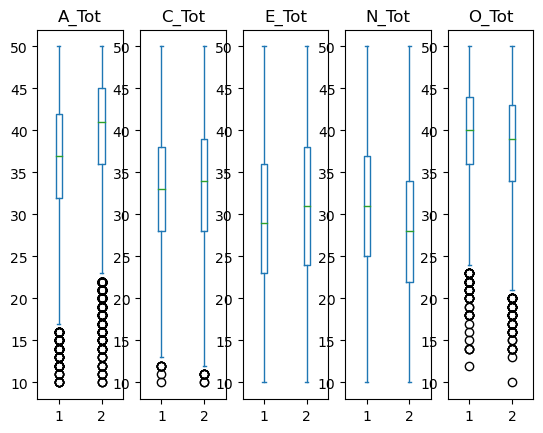

In [ ]:
dat_reduced_g.plot.box(by = "gender")

Produces a boxplot for each factor (separated by gender) and shows the lower, middle, and upper quartile (i.e., 25th, 50th, and 75th percentile) which together make up the interquartile range (IQR). The IQR can be used to assess the spread of the data.

This plot does provide some good information but it does not look very nice -- probably won't use (try to find better boxplot)

[Text(0.5, 1.0, 'Openness'), Text(0.5, 0, ''), Text(0, 0.5, '')]

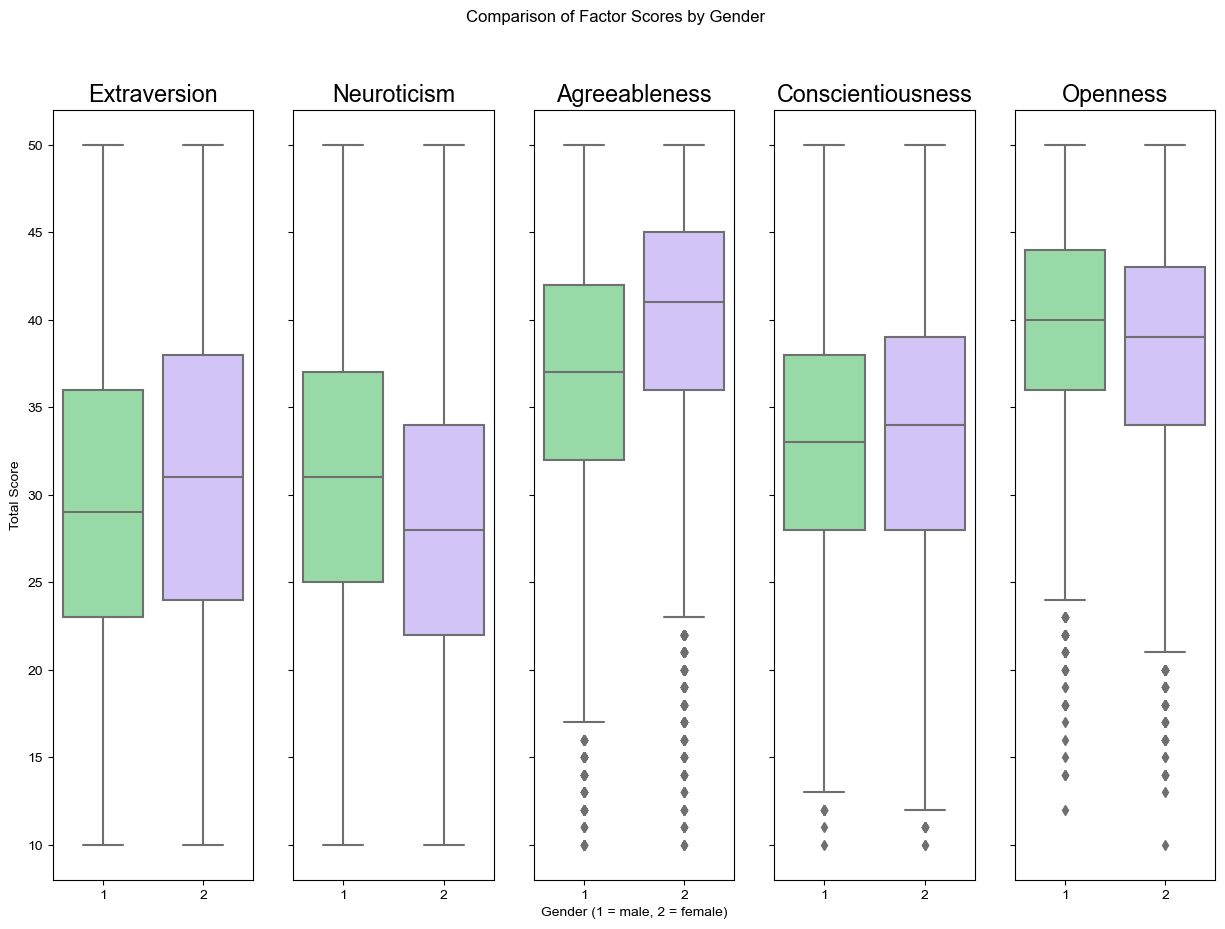

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 10), sharex = True, sharey = True)
fig.suptitle('Comparison of Factor Scores by Gender')
sb.set_theme(context = "notebook", style = "whitegrid", palette="pastel", font_scale = 1.4)
sb.boxplot(ax=axes[0],x="gender", y = dat_reduced_g["E_Tot"], palette=["g", "m"],
            data=dat_reduced_g).set(title = "Extraversion", xlabel = "", ylabel = "Total Score")
sb.boxplot(ax=axes[1],x="gender", y = dat_reduced_g["N_Tot"], palette=["g", "m"],
            data=dat_reduced_g).set(title = "Neuroticism", xlabel = "", ylabel = "")
sb.boxplot(ax=axes[2],x="gender", y = dat_reduced_g["A_Tot"], palette=["g", "m"],
            data=dat_reduced_g).set(title = "Agreeableness", xlabel = "Gender (1 = male, 2 = female)", ylabel = "")
sb.boxplot(ax=axes[3],x="gender", y = dat_reduced_g["C_Tot"], palette=["g", "m"],
            data=dat_reduced_g).set(title = "Conscientiousness", xlabel = "", ylabel = "")
sb.boxplot(ax=axes[4],x="gender", y = dat_reduced_g["O_Tot"], palette=["g", "m"],
            data=dat_reduced_g).set(title = "Openness", xlabel = "", ylabel = "")

A much better boxplot! Will likely be used later

As previously mentioned, the boxplot shows the lower, middle, and upper quartile (i.e., 25th, 50th, and 75th percentile) which together make up the interquartile range (IQR). The IQR can be used to assess the spread of the data. The boxplot also shows outliers and can identify skew in the data. Comparing the 'boxes' between males and females can be used to help answer the RQ

[Text(0.5, 1.0, 'Openness'), Text(0.5, 0, ''), Text(0, 0.5, '')]

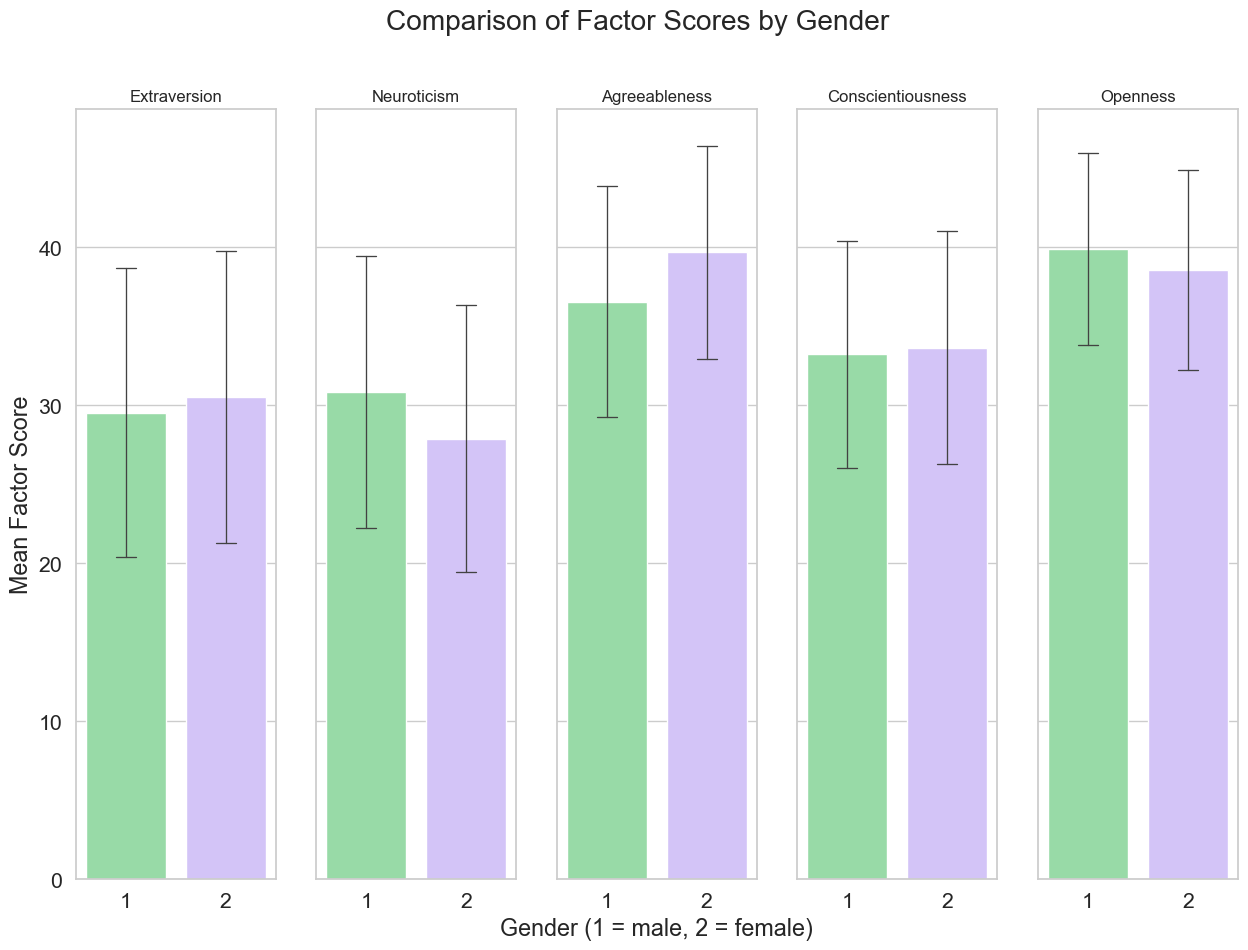

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 10),sharex=True, sharey = True)
fig.suptitle('Comparison of Factor Scores by Gender')
sb.set_theme('notebook', "whitegrid", palette = "pastel")

sb.barplot(ax=axes[0],x="gender", y = "E_Tot", palette=["g", "m"], errorbar = "sd", errwidth = .95,capsize = .20,
            data=dat_reduced_g).set(title = "Extraversion", xlabel = "", ylabel = "Mean Factor Score")
sb.barplot(ax=axes[1],x="gender", y = "N_Tot", palette=["g", "m"], errorbar = "sd", errwidth = .95,capsize = .20,
            data=dat_reduced_g).set(title = "Neuroticism", xlabel = "", ylabel = "")
sb.barplot(ax=axes[2],x="gender", y = "A_Tot", palette=["g", "m"], errorbar = "sd", errwidth = .95,capsize = .20,
            data=dat_reduced_g).set(title = "Agreeableness", xlabel = "Gender (1 = male, 2 = female)", ylabel = "")
sb.barplot(ax=axes[3],x="gender", y = "C_Tot", palette=["g", "m"], errorbar = "sd", errwidth = .95,capsize = .20,
            data=dat_reduced_g).set(title = "Conscientiousness", xlabel = "", ylabel = "")
sb.barplot(ax=axes[4],x="gender", y = "O_Tot", palette=["g", "m"], errorbar = "sd", errwidth = .95,capsize = .20,
            data=dat_reduced_g).set(title = "Openness", xlabel = "", ylabel = "")

Bar plot showing comparison of mean factor scores, by gender.

Error bars show standard deviation, clearly they are very large and they all overlap which makes it difficult to draw conclusions by simply comparing means since there is lots of variation within the sample data. It is hard to determine if the differences between males and females are "meaningful" in a statistical sense without performing significance testing. 

For this project, this plot is useful for comparing the means of males and females on the 5 factors (i.e., by comparing the height of the bars).

In [ ]:
corr = dat_reduced.corr()
corr.style.background_gradient(cmap='PuRd')

,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
E_Tot,1.000000,0.262475,0.333979,0.106191,0.166116
N_Tot,0.262475,1.000000,0.111982,0.259772,0.100900
A_Tot,0.333979,0.111982,1.000000,0.175842,0.116139
C_Tot,0.106191,0.259772,0.175842,1.000000,0.086040
O_Tot,0.166116,0.100900,0.116139,0.086040,1.000000


Correlation matrix of 5 factors (darker colours indicate greater magnitude of correlation). Here, we can see that the highest correlation is between A and E while the lowest correlation is between O and C. 

One option for correlation plot. Not as nice as the following plot. 

*Colour not appearing on GitHub? Not sure why....*

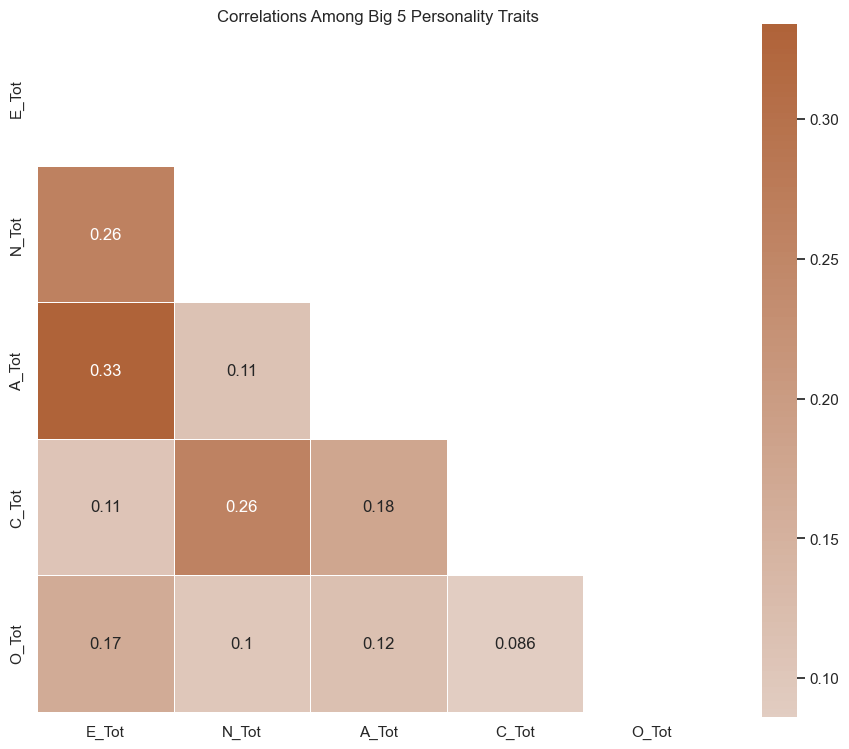

In [ ]:
#Hide upper triangle (repeating values, not necessary and makes the figure 'noisier')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap 
cmap = sb.diverging_palette(220, 2550, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heat_map = sb.heatmap(corr, mask=mask, cmap = cmap, annot = True, center=0,
            square=True, linewidths=.7).set(title = "Correlations Among Big 5 Personality Traits")

Another option for correlation matrix plot -- this one looks better that the previous one. 

Again, we can see that the largest correlation is between A and E while the smallest correlation is between O and C. 

This plot also hides the upper triangle and makes it a bit easier to visually scan the matrix to locate relevant parts; it also removes the redundant upper triangle since they are repeated values. 

#### Checkpoint
Wow! That's a lot of visualizations... some definitely seem better suited to by current research questions but they are all interesting to look at and notice different patterns, themes, and relationships within the data. In a later section, the visualizations will be described in greater detail and in regard to the research questions -- for now, they are more to get an idea of what I will want to use later. 

This marks the end of my EDA and will now move on to the analysis pipeline. 

# Analysis Pipeline

### Import Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

## Load Data

In [ ]:
dat_1 = pd.read_csv("../data/raw/data.csv", sep='\t')

## Clean Data
*Dropping columns that are not used in further analyses (i.e., English as a native language, handedness, how the participant got to the questionnaire, the participants' country, the race of the participant, and the age of the participant)*

*Dropping row index 19064 since it is missing all of the questionnaire data*

In [ ]:
dat_2 = dat_1.copy().drop(['engnat','hand','source', 'country', 'race', 'age'], axis=1)
dat_3 = dat_2.copy().drop([19064], axis=0)

#### Checkpoint
By this point, the data has been loaded and the unused columns have been dropped as well as the row with missing data. Next, the data will be processed to get it to the state where analysis can be conducted. 

## Process Data


### Reverse Scoring
*Reverse scoring is used since the original questionnaire includes questions that are reverse coded -- that is, the questions are worded in a way opposite to their relation with the construct being assessed*


In [ ]:
def reverseScoring(df, high, cols):
    df[cols] = high - df[cols]
    return df

dat = reverseScoring(dat_3, 6, cols=["E2", "E4", "E6", "E8", "E10", "N1", "N3", "N5", "N6", "N7", "N8", "N9", "N10", "A1", "A3", "A5", "A7", "C2", "C4", "C6", "C8", "O2", "O4", "O6"])
#Converts the specified column values to be reverse scored (based on reverse-worded questions) such that 1 becomes 5, 2 becomes 4, 3 stays the same, 4 becomes 2, and 5 becomes 1

### Create Factor Score Columns
*Factor Score/Total columns (i.e., the sum of a participants' score on all items pertaining to the same factor) are created in order to use in further analyses*

In [ ]:
dat["E_Tot"] = dat["E1"]+dat["E2"]+dat["E3"]+dat["E4"]+dat["E5"]+dat["E6"]+dat["E7"]+dat["E8"]+dat["E9"]+dat["E10"]
dat["N_Tot"] = dat["N1"]+dat["N2"]+dat["N3"]+dat["N4"]+dat["N5"]+dat["N6"]+dat["N7"]+dat["N8"]+dat["N9"]+dat["N10"]
dat["A_Tot"] = dat["A1"]+dat["A2"]+dat["A3"]+dat["A4"]+dat["A5"]+dat["A6"]+dat["A7"]+dat["A8"]+dat["A9"]+dat["A10"]
dat["C_Tot"] = dat["C1"]+dat["C2"]+dat["C3"]+dat["C4"]+dat["C5"]+dat["C6"]+dat["C7"]+dat["C8"]+dat["C9"]+dat["C10"]
dat["O_Tot"] = dat["O1"]+dat["O2"]+dat["O3"]+dat["O4"]+dat["O5"]+dat["O6"]+dat["O7"]+dat["O8"]+dat["O9"]+dat["O10"]

#Create new columns containing the total scores for each individual on each of the 5 factors 

## Wrangle Data

In [ ]:
## Not sure exactly what to put here -- I do not need to restructure the data or merge any new data so I will create subsets here

### Create Subsets

In [ ]:
dat_reduced_g = dat[["gender", "E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]

dat_reduced = dat[["E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]

#Create subsets to get dataframes with only total score columns; with and without gender

In [ ]:
values = [0, 3, 1]
dat_f = dat_reduced_g[dat_reduced_g.gender.isin(values) == False]
dat_f
#Create "female" subset (only include rows where gender = 2 (female)

,gender,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
1,2,22,29,35,42,26
2,2,35,14,38,49,45
3,2,22,17,37,26,41
4,2,34,30,44,34,34
5,2,16,36,36,31,33
...,...,...,...,...,...,...
19710,2,30,24,40,34,33
19711,2,21,26,42,36,39
19712,2,40,43,48,30,39
19714,2,21,19,42,36,35


In [ ]:
values = [0, 3, 2]
dat_m = dat_reduced_g[dat_reduced_g.gender.isin(values) == False]
dat_m
#Create "male" subset (only include rows where gender = 1 (male)

,gender,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
0,1,44,49,46,47,43
7,1,39,45,41,44,42
11,1,30,36,35,30,38
15,1,28,41,17,42,47
23,1,33,38,41,31,38
...,...,...,...,...,...,...
19708,1,25,35,40,20,44
19713,1,14,39,43,37,30
19716,1,21,10,26,23,37
19717,1,21,20,38,43,42


#### Checkpoint
Great! Now I have all of the cleaned and processed dataframes I will use for analyses. The reverse-coded items have been reverse scored, factor total scores have been created, and subsets have been created. Next, I will create method chains to make the process more concise. 

# Method Chain

## Build Method Chains

### Load packages/functions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import project_functions2 as pf

### Method Chain 1
*Method chain to load csv file, drop unwanted columns (specified in analysis pipeline), and remove a row with missing data*

In [ ]:
dat_2 = (pd.read_csv("../data/raw/data.csv", sep='\t')
    .copy().drop(['engnat','hand','source', 'country', 'race', 'age'], axis=1)
    .copy().drop([19064], axis=0))
    
dat_2

#load csv file, drop unwanted columns, and remove a row with missing data

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,4,2,5,2,5,1,4,3,5,...,4,1,3,1,5,1,4,2,5,5
1,2,2,2,3,3,3,3,1,5,1,...,3,3,3,3,2,3,3,1,3,2
2,2,5,1,1,4,5,1,1,5,5,...,4,5,5,1,5,1,5,5,5,5
3,2,2,5,2,4,3,4,3,4,4,...,4,3,5,2,4,2,5,2,5,5
4,2,3,1,3,3,3,1,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,2,1,4,3,5,4,3,1,2,1,...,1,3,5,3,4,1,4,2,5,3
19715,2,2,3,2,3,2,3,2,4,4,...,1,2,3,2,3,3,4,2,3,3
19716,1,2,5,4,5,5,5,1,2,1,...,5,3,1,3,4,1,1,5,5,5
19717,1,1,4,2,3,2,4,1,3,4,...,3,2,5,3,4,1,5,3,5,5


### Method Chain 2
*First, reverse score items that are reverse-coded. Then, assign new columns containing factor total scores by summing scores on the constituent items for each factor.*

In [ ]:
def reverseScoring(df, high, cols):
    df[cols] = high - df[cols]
    return df

dat_2 = reverseScoring(dat_2, 6, cols=["E2", "E4", "E6", "E8", "E10", "N1", "N3", "N5", "N6", "N7", "N8", "N9", "N10", "A1", "A3", "A5", "A7", "C2", "C4", "C6", "C8", "O2", "O4", "O6"])

dat_3 = (pd.DataFrame(dat_2)
        .assign(E_Tot=lambda x: dat_2["E1"]+dat_2["E2"]+dat_2["E3"]+dat_2["E4"]+dat_2["E5"]+dat_2["E6"]+dat_2["E7"]+dat_2["E8"]+dat_2["E9"]+dat_2["E10"])
        .assign(N_Tot=lambda x: dat_2["N1"]+dat_2["N2"]+dat_2["N3"]+dat_2["N4"]+dat_2["N5"]+dat_2["N6"]+dat_2["N7"]+dat_2["N8"]+dat_2["N9"]+dat_2["N10"])
        .assign(A_Tot=lambda x: dat_2["A1"]+dat_2["A2"]+dat_2["A3"]+dat_2["A4"]+dat_2["A5"]+dat_2["A6"]+dat_2["A7"]+dat_2["A8"]+dat_2["A9"]+dat_2["A10"])
        .assign(C_Tot=lambda x: dat_2["C1"]+dat_2["C2"]+dat_2["C3"]+dat_2["C4"]+dat_2["C5"]+dat_2["C6"]+dat_2["C7"]+dat_2["C8"]+dat_2["C9"]+dat_2["C10"])
        .assign(O_Tot=lambda x: dat_2["O1"]+dat_2["O2"]+dat_2["O3"]+dat_2["O4"]+dat_2["O5"]+dat_2["O6"]+dat_2["O7"]+dat_2["O8"]+dat_2["O9"]+dat_2["O10"]))

dat_3

#Reverse score items before creating total scores
#Method chain to create columns with factor total scores by summing scores on the constituent variables for each factor

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O6,O7,O8,O9,O10,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
0,1,4,4,5,4,5,5,4,3,5,...,5,4,2,5,5,44,49,46,47,43
1,2,2,4,3,3,3,3,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,2,5,5,1,2,5,5,1,1,5,...,5,5,5,5,5,35,14,38,49,45
3,2,2,1,2,2,3,2,3,2,4,...,4,5,2,5,5,22,17,37,26,41
4,2,3,5,3,3,3,5,3,5,3,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,2,1,2,3,1,4,3,1,4,1,...,5,4,2,5,3,21,19,42,36,35
19715,2,2,3,2,3,2,3,2,2,4,...,3,4,2,3,3,25,39,36,32,30
19716,1,2,1,4,1,5,1,1,4,1,...,5,1,5,5,5,21,10,26,23,37
19717,1,1,2,2,3,2,2,1,3,4,...,5,5,3,5,5,21,20,38,43,42


#### Checkpoint
Two method chains have been created. The first one loads the data and drops unwanted columns and rows. The second one reverse scores items and creates factor total scores. Next, I will wrap the method chains into a function to make the process even more concise and efficient. 

## Wrap Method Chains in Function
*Created a new function (called 'load_and_process') by including the two method chains and saved it in a .py file. Then, import the .py file (containing the new function) and run it using a relative path to the desired dataset*

Now we can easily load, clean, and process the data in one step!

In [ ]:
import project_functions2 as pf
dat = pf.load_and_process("../data/raw/data.csv")
dat
#Reverse scoring function (reverseScoring) and method chains wrapped in a function (load_and_process) in "project_functions2.py"

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O6,O7,O8,O9,O10,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
0,1,4,4,5,4,5,5,4,3,5,...,5,4,2,5,5,44,49,46,47,43
1,2,2,4,3,3,3,3,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,2,5,5,1,2,5,5,1,1,5,...,5,5,5,5,5,35,14,38,49,45
3,2,2,1,2,2,3,2,3,2,4,...,4,5,2,5,5,22,17,37,26,41
4,2,3,5,3,3,3,5,3,5,3,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,2,1,2,3,1,4,3,1,4,1,...,5,4,2,5,3,21,19,42,36,35
19715,2,2,3,2,3,2,3,2,2,4,...,3,4,2,3,3,25,39,36,32,30
19716,1,2,1,4,1,5,1,1,4,1,...,5,1,5,5,5,21,10,26,23,37
19717,1,1,2,2,3,2,2,1,3,4,...,5,5,3,5,5,21,20,38,43,42


#### Checkpoint
I have successfully created a function to run my method chains, placed it in a .py file, and imported and run the function in my .ipynb file. This makes it quick and easy to load, clean, and process my data. Next, I will analyse the data in regard to my research questions.

# Analysis for RQ

### Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

## Create Subsets (total score columns with gender variations)
*Subsets are used to produce a dataframe with only select data from the original dataframe. In this case, I want to create four subsets -- one including only the factor total scores, one including factor total scores and gender, one including factor total scores for females only, and one including factor total scores for males only*

In [ ]:
#total scores without gender
#Note: recall lower N scores correspond to greater neuroticism; higher scores to greater emotional stability
dat_sub = dat[["E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]

In [ ]:
#total scores with gender = 1 (male) and 2 (female)
values = [0,3]
dat_sub_g1 = dat[["gender","E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]
dat_sub_g = dat_sub_g1[dat_sub_g1.gender.isin(values) == False]

In [ ]:
#Female only
values = [0, 3, 1]
dat_f = dat_sub_g1[dat_sub_g1.gender.isin(values) == False]

In [ ]:
#Male only
values = [0, 3, 2]
dat_m = dat_sub_g1[dat_sub_g1.gender.isin(values) == False]

#### Checkpoint
The data is loaded, cleaned, processed, and subsets have been created. Now I am ready to inspect the data and answer my research questions. 

## RQ 1: Relationship Among Personality Traits

Hypothesis 1: There is a positive correlation between Openness and Extraversion; Openness and Agreeableness; Extraversion and Agreeableness; Conscientiousness and Agreeableness; Emotional Stability* and Extraversion, and Emotional Stability* and Agreeableness. 

*Note: in the dataset, high neuroticism (low emotional stability) is at the low end of the continuum so a high score on the N factor corresponds to low neuroticism/high emotional stability.

*This analysis will assess whether there are relationships between the factor total scores (i.e., whether the specified traits, as stated in the hypothesis, are correlated with one another)* 


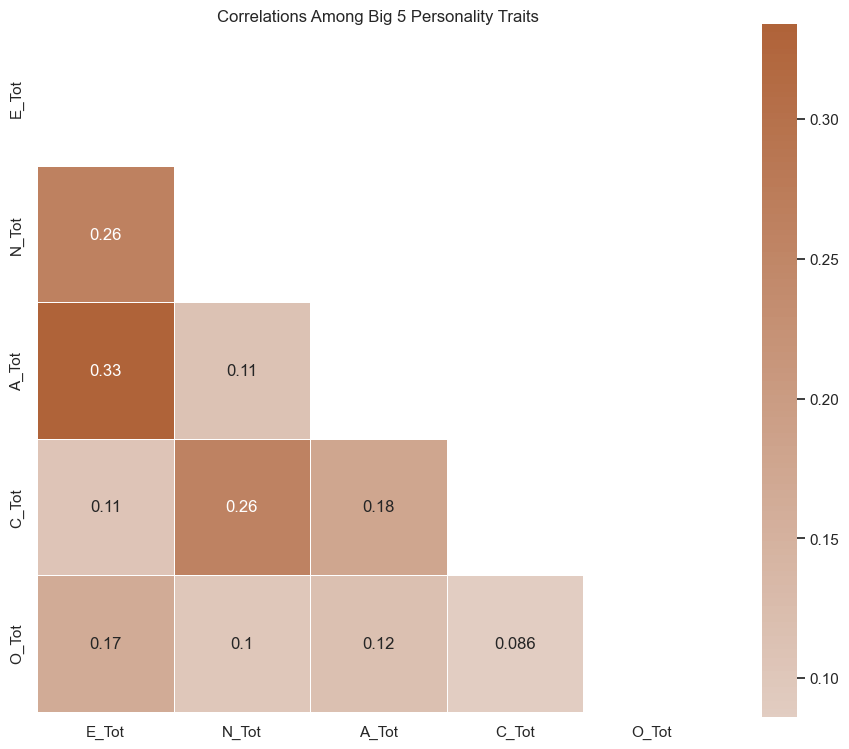

In [ ]:
corr = dat_sub.corr("pearson")

#Hide upper triangle (repeating values, not necessary and makes the figure 'noisier')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap 
cmap = sb.diverging_palette(220, 2550, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heat_map = sb.heatmap(corr, mask=mask, cmap = cmap, annot = True, center=0,
            square=True, linewidths=.7).set(title = "Correlations Among Big 5 Personality Traits")

### Figure 1: Correlations Among Big 5 Personality Traits

This plot shows the Pearson's correlation among the 5 factors. The darker colours represent greater magnitude of correlation (e.g., .33 is greater than .11 so it is a darker shade). 

Regarding RQ 1, this plot supports the hypothesized positive correlation between: Openness and Extraversion with a correlation of .17; Openness and Agreeableness with a correlation of .12; Extraversion and Agreeableness with a correlation of .33; Agreeableness and Conscientiousness with a correlation of .18; Emotional Stability and Extraversion with a correlation of .26; and Emotional Stability and Agreeableness with a correlation of .11

All correlations are positive but vary in magnitude -- the strongest correlation is seen between Extraversion and Agreeableness (*r* = .33), and the weakest correlations are between Emotional Stability and Agreeableness (*r* = .11) and Openness and Agreeableness (*r* = .12).

Further support for the hypothesis comes from the observation that the remaining correlations among factors not identified in the hypothesis are lower than those with hypothesized relationships. In other words, among the factors that did not have a hypothesized significant relationship, the correlations were lower, on average, than those where there was a hypothesized relationship (based on extant research). Therefore, it makes sense to conclude that the data support the hypothesis since the hypothesized relationships were found and there were not significant relationships beyond those specified in the hypothesis. 

## RQ 2: Relationship Between Gender and Personality Traits
H2: Based on extant research, on average, females will show higher scores than men on Extraversion, and Agreeableness, lower scores on Emotional Stability*, and there are will be no significant gender differences for Conscientiousness or Openness.

*Indicated by high Neuroticism score

### Descriptive Statistics

In [ ]:
dat_m.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
#For males

,gender,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
count,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000
mean,1.000000,29.542587,30.851341,36.549422,33.224632,39.866062
std,0.000000,9.164005,8.610305,7.318780,7.170913,6.076097
min,1.000000,10.000000,10.000000,10.000000,10.000000,12.000000
25%,1.000000,23.000000,25.000000,32.000000,28.000000,36.000000
50%,1.000000,29.000000,31.000000,37.000000,33.000000,40.000000
75%,1.000000,36.000000,37.000000,42.000000,38.000000,44.000000
max,1.000000,50.000000,50.000000,50.000000,50.000000,50.000000


In [ ]:
dat_f.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
#For females

,gender,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
count,11984.000000,11984.000000,11984.000000,11984.000000,11984.000000,11984.000000
mean,2.000000,30.525117,27.891439,39.676318,33.649449,38.569259
std,0.000000,9.227630,8.427500,6.740164,7.386270,6.314642
min,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000
25%,2.000000,24.000000,22.000000,36.000000,28.000000,34.000000
50%,2.000000,31.000000,28.000000,41.000000,34.000000,39.000000
75%,2.000000,38.000000,34.000000,45.000000,39.000000,43.000000
max,2.000000,50.000000,50.000000,50.000000,50.000000,50.000000


In [ ]:
dat_sub_g.groupby('gender').mean()

#Male higher than female - N and O
#Female higher than male - E, A, C

,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
gender,,,,,
1,29.542587,30.851341,36.549422,33.224632,39.866062
2,30.525117,27.891439,39.676318,33.649449,38.569259


In [ ]:
dat_sub_g.groupby('gender').median()

#Male higher than female - N and O
#Female higher than male - E, A, C

,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
gender,,,,,
1,29.0,31.0,37.0,33.0,40.0
2,31.0,28.0,41.0,34.0,39.0


### Visualizations

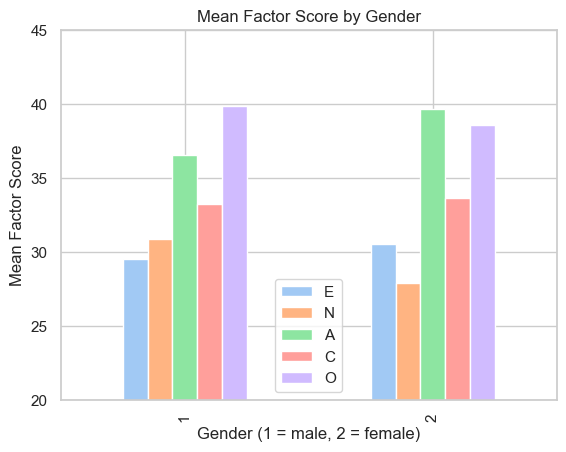

In [ ]:
dat_sub_g.groupby("gender").mean().plot.bar(grid=True, width =.5).set(title = "Mean Factor Score by Gender", xlabel = "Gender (1 = male, 2 = female)", ylabel = "Mean Factor Score")
plt.ylim(20,45)
plt.legend(labels = "ENACO", loc = "lower center")
plt.savefig("barbygender.png", dpi = 300)
#Shows mean score on each factor separated by gender 
#Males higher on O and N
#Females higher on E, A, C
#Note: similar pattern except males higher on N than E and females higher on E than N; males higher on O than A and females higher on A than O 

#### Figure 2

This plot shows the mean factor scores for each of the 5 factors, separated by gender. 

This plot is a good starting point to see roughly where there are gender differences in the data. For instance, I can see that men show higher scores than females on Openness and Neuroticism (emotional stability) while females show higher scores on Extraversion and Agreeableness. However, this plot is not the easiest to interpret since the bars for the same factor are not beside each other. Figure 4 will show side-by-side comparisons of means to make the analysis a bit easier. 

Although not a part of the research questions, I found it interesting that the pattern of scores were similar in some ways (e.g., both genders showed higher scores on Agreeableness, Conscientiousness, and Openness than Extraversion and Neuroticism (emotional stability); both genders showed the highest scores for Agreeableness and Openness. However, males showed higher scores on Neuroticism than extraversion whereas females showed higher scores on Extraversion than Neuroticism (emotional stability) and males showed higher scores on Openness than Agreeableness whereas females showed higher scores on Agreeableness than Openness. 

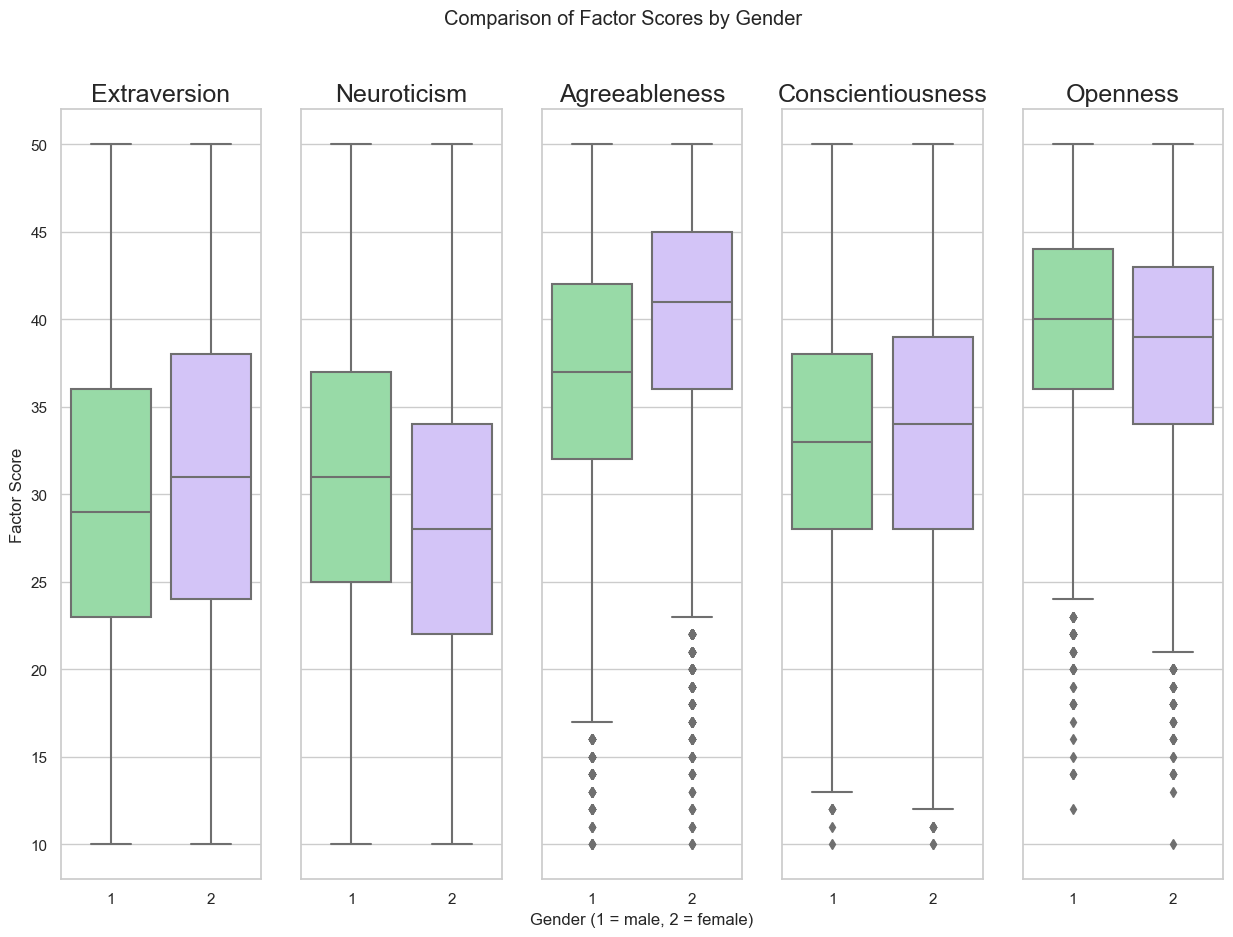

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 10), sharex = True, sharey = True)
fig.suptitle('Comparison of Factor Scores by Gender')
sb.set_theme(context = "notebook", style = "whitegrid", palette="pastel", font_scale = 1.5)

sb.boxplot(ax=axes[0],x="gender", y = dat_sub_g["E_Tot"], palette=["g", "m"],
            data=dat_sub_g).set(title = "Extraversion", xlabel = "", ylabel = "Factor Score")
sb.boxplot(ax=axes[1],x="gender", y = dat_sub_g["N_Tot"], palette=["g", "m"],
            data=dat_sub_g).set(title = "Neuroticism", xlabel = "", ylabel = "")
sb.boxplot(ax=axes[2],x="gender", y = dat_sub_g["A_Tot"], palette=["g", "m"],
            data=dat_sub_g).set(title = "Agreeableness", xlabel = "Gender (1 = male, 2 = female)", ylabel = "")
sb.boxplot(ax=axes[3],x="gender", y = dat_sub_g["C_Tot"], palette=["g", "m"],
            data=dat_sub_g).set(title = "Conscientiousness", xlabel = "", ylabel = "")
sb.boxplot(ax=axes[4],x="gender", y = dat_sub_g["O_Tot"], palette=["g", "m"],
            data=dat_sub_g).set(title = "Openness", xlabel = "", ylabel = "")

plt.savefig("boxplot.png", dpi = 300)

#### Figure 3

Box plots showing the median (50th percentile), 25th percentile, and 75th percentile of each of the 5 factors, separated by gender. The bottom line of the box represents the 25th percentile, the middle line in the box represents the median, and the upper line of the box represents the 75th percentile. All together, the box represents the middle 50% of the data points and is referred to as the interquartile range (IQR). The lines extending from the boxes represent 1.5x the IQR and are indicative of the spread of the data -- that is, how closely clustered the individual data points are to the average. 

In this plot, the lines for Extraversion and Neuroticism extend all the way to the minimum and maximum scores, indicating a large amount of variation (i.e., spread) in the data. The plots for Agreeableness, Conscientiousness, and Openness extend to the maximum but not to the minimum. This is likely because the distribution for these factors is negatively skewed (i.e., clustered more closely to the high end of the continuum), as demonstrated in the EDA. The diamond points below the line indicate outliers in the data which are simply determined by being outside of the IQR. Based on the large sample size, skew of the data, and nature of the constructs being measured, I have chosen to keep the outliers since they are likely "true outliers" that represent natural variation in the data (e.g., it is not unreasonable that some individuals will have much lower scores on some factors than other individuals). 

This plot is useful because it gives a lot of information about the averages and distribution of the data. For instance, it can be used to compare median scores between genders which will be useful for answering the research question. 

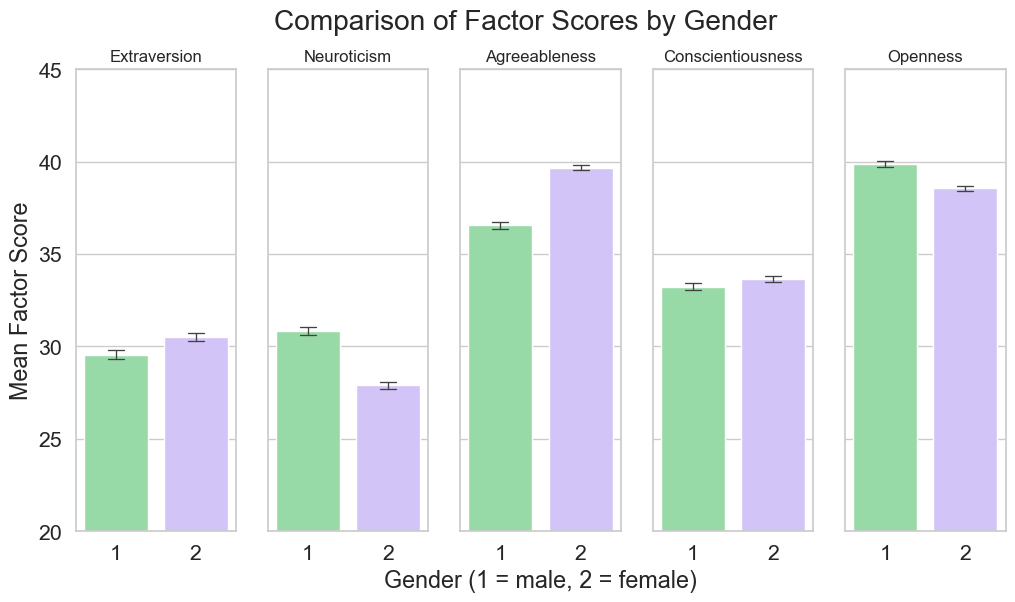

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(12, 6),sharex=True, sharey = True)
fig.suptitle('Comparison of Factor Scores by Gender')
sb.set_theme('notebook', "whitegrid", palette = "pastel")

sb.barplot(ax=axes[0],x="gender", y = "E_Tot", palette=["g", "m"], errorbar = ("ci", 98), errwidth = .95,capsize = .20,
            data=dat_sub_g).set(title = "Extraversion", xlabel = "", ylabel = "Mean Factor Score")
sb.barplot(ax=axes[1],x="gender", y = "N_Tot", palette=["g", "m"], errorbar = ("ci", 98), errwidth = .95,capsize = .20,
            data=dat_sub_g).set(title = "Neuroticism", xlabel = "", ylabel = "")
sb.barplot(ax=axes[2],x="gender", y = "A_Tot", palette=["g", "m"], errorbar = ("ci", 98), errwidth = .95,capsize = .20,
            data=dat_sub_g).set(title = "Agreeableness", xlabel = "Gender (1 = male, 2 = female)", ylabel = "")
sb.barplot(ax=axes[3],x="gender", y = "C_Tot", palette=["g", "m"], errorbar = ("ci", 98), errwidth = .95,capsize = .20,
            data=dat_sub_g).set(title = "Conscientiousness", xlabel = "", ylabel = "")
sb.barplot(ax=axes[4],x="gender", y = "O_Tot", palette=["g", "m"], errorbar = ("ci", 98), errwidth = .95,capsize = .20,
            data=dat_sub_g).set(title = "Openness", xlabel = "", ylabel = "")

plt.ylim(20,45)
plt.savefig("barplot.png", dpi = 300)
#Bar plot showing comparison of mean factor scores, by gender.
#Error bars show 98% confidence intervals; only possible overlap for C

#### Figure 4

Bar plot showing the mean factor scores for each of the 5 factors, separated by gender. Error bars represent 98% confidence intervals. 

Compared to Figure 2, this plot makes it easier to see the differences between factor scores for each gender. It is clear that Extraversion and Neuroticism have lower average scores, and Agreeableness and Openness have higher average scores, than the other factors for both genders. When comparing between genders, the error bars representing the confidence intervals can be helpful for determining whether the difference in group means is significant -- that is, if the error bars overlap with one another, it is likely that the difference between group means is not significant. For the current research, the only factor that has error bars close to overlapping is Conscientiousness. This is in line with the hypothesis that Conscientiousness would not show significant gender differences. The other proposed null relationship was between gender and Openness -- while this factor does appear to show gender differences, the magnitude is less than that of the other 3 factors (i.e., E, N, and A). Therefore, it appears that I have support for the hypothesis that there are gender differences for the Extraversion, Neuroticism, and Agreeableness factors. 

## Conclusion (RQ 2)

First, I looked at some descriptive statistics for the factor total scores for males and for females as well as produced the mean and median factor scores for males and for females in the sample. Then, I produced and analyzed 3 visualizations to try and elucidate the relationships between gender and average factor scores. 

Both a comparison of mean/median values and the visualizations showed consistent relationships between gender and average factor scores that mostly support the hypothesis for RQ 2.  


Based on the error bars in Figure 4, I am confident that the difference in mean factor scores is significant for Extraversion, Neuroticism (Emotional Stability), Agreeableness, and Openness. The difference between mean factor scores for Conscientiousness was very small and the error bars are close to overlap, suggesting that this difference in means is not significant (i.e., negligible). However, the standard deviations and interquartile ranges for all of the average factor scores are large and indicate a lot of variation within the data. Thus, it is difficult to draw conclusions without having more information about the sample and while using relatively simple statistical analyses (e.g., visual comparison of average scores).  

In regard to RQ 2, I believe the hypothesis is mostly supported since females show higher average scores than males on Extraversion and Agreeableness as well as lower scores on Neuroticism (i.e., lower emotional stability). Additionally, females show higher average scores than males on Conscientiousness and lower average scores on Openness, but the difference is less than for the other three factors. The only part of the analysis that revealed evidence contrary to the hypothesis was for the Openness factor -- it was hypothesized that there would not be significant gender differences for this factor but Figure 4 shows different mean factors scores for males vs. females and the 98% confidence interval does not overlap, suggesting a significant relationship. That being said, the difference in means for Openness was still less than the three hypothesized relationships.